In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")



# Step-1 : Business Problem Understand
  
    
    
# Step-2 : Data Understanding

df= pd.read_csv("Mall_Customers.csv")
print(df)
print("-"*100)

print(df.info())
print("-"*100)

print(df["CustomerID"].unique())
print(df["CustomerID"].value_counts())
print("-"*100)

print(df["Genre"].unique())
print(df["Genre"].value_counts())
print("-"*100)

print(df["Age"].unique())
print(df["Age"].value_counts())
print("-"*100)

print(df["Annual Income (k$)"].unique())
print(df["Annual Income (k$)"].value_counts())
print("-"*100)

print(df["Spending Score (1-100)"].unique())
print(df["Spending Score (1-100)"].value_counts())
print("-"*100)

print(df.describe(include="all"))

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
----------------------------------------------------------------------------------------------------

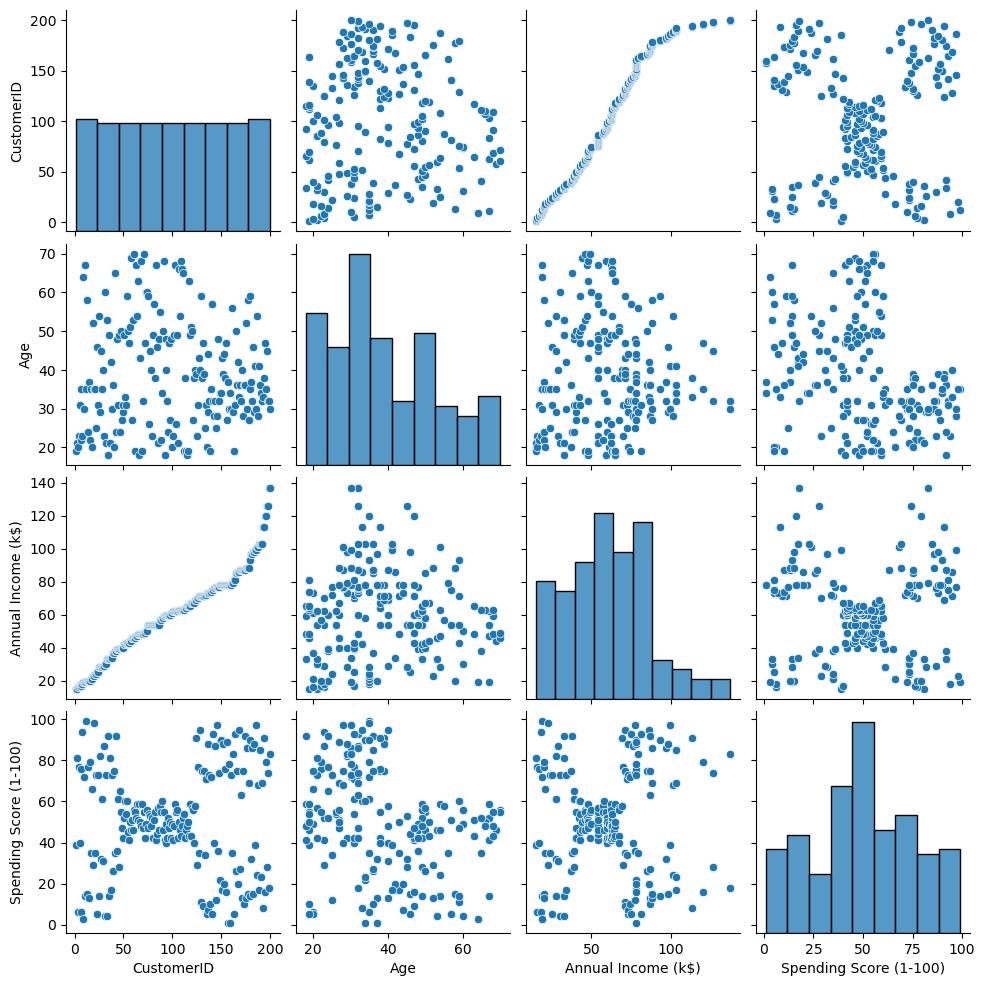

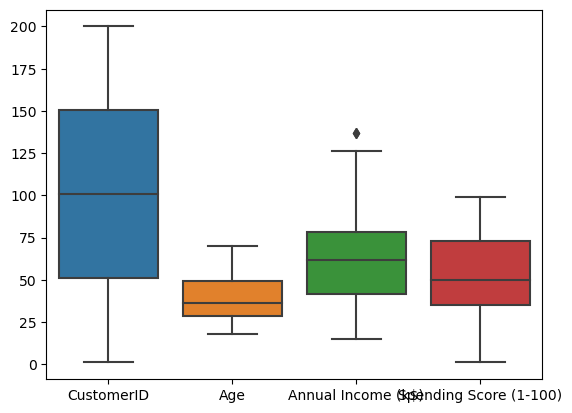

     CustomerID   Genre  Age  Income  Score
0             1    Male   19      15     39
1             2    Male   21      15     81
2             3  Female   20      16      6
3             4  Female   23      16     77
4             5  Female   31      17     40
..          ...     ...  ...     ...    ...
195         196  Female   35     120     79
196         197  Female   45     126     28
197         198    Male   32     126     74
198         199    Male   32     137     18
199         200    Male   30     137     83

[200 rows x 5 columns]


In [2]:
sns.pairplot(df)
plt.show()

sns.boxplot(df)
plt.show()

df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True)
print(df)





<Axes: xlabel='Income', ylabel='Score'>

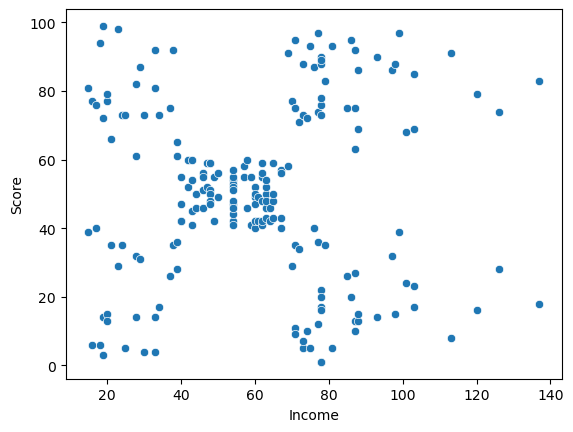

In [3]:
sns.scatterplot(x="Income",y="Score",data=df)

CustomerID    0
Genre         0
Age           0
Income        0
Score         0
dtype: int64
----------------------------------------------------------------------------------------------------
0
----------------------------------------------------------------------------------------------------


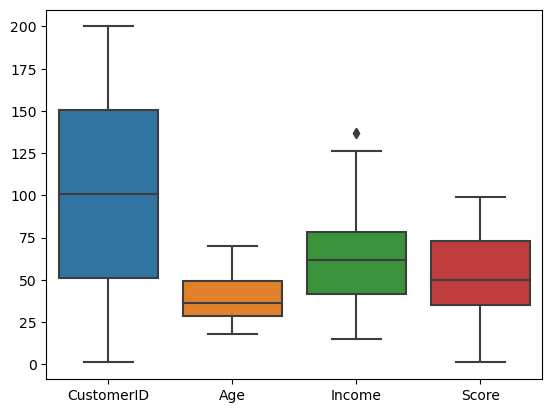

----------------------------------------------------------------------------------------------------
     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


In [4]:
# Step-3 : Data Preprocessing 

# Data Cleaning : 

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())
print("-"*100)

sns.boxplot(df)    # Here we will get one outlier in Income column but should not remove that column (because for shopping purpose income is high good for model.)
plt.show()
print("-"*100)

# The CustermerID culumn have all unique only, so should drop that column
df.drop(columns=["CustomerID","Genre"],inplace=True)
print(df)

# Data Wrangling : 

# df["Genre"].replace({"Female":0,"Male":1},inplace=True)
# print(df)

In [5]:
X = df
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


In [10]:
# Finding the optimum number of clusters for given dataset

wcss = []

for k in range(1,11):    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters =k , init = "k-means++")
    kmeans.fit(X)
    kmeans.inertia_        # Here inertia means wcss value for a individual k value.
    wcss.append(kmeans.inertia_)

print(wcss)    # By observing wcss we can easily identify the right K value for the given dataset(i.e. 5), beacuse from k=5 thje differences between wcss got minimized nearly simliar.

[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51098.58740856845, 44307.87341670445, 40622.67755719132, 37682.2033075112]


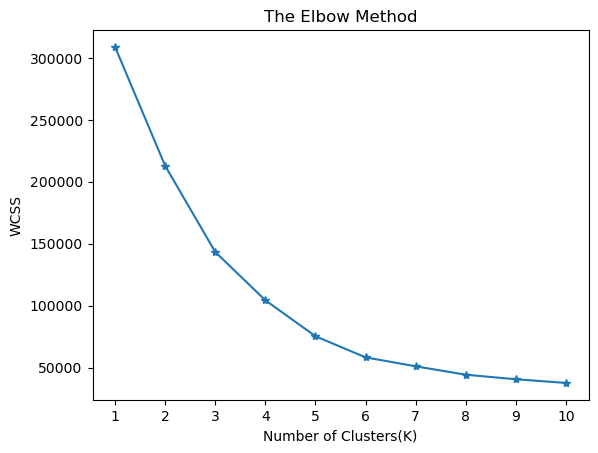

In [13]:
# Finding the optimum number of clusters for given dataset by using ELBOW Technique

plt.plot(range(1,11),wcss,marker="*")   # Here, we can observe that from x=5 the line becomes nearly straight so that gives us right value of K=5
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.show()

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , init = "k-means++", random_state=True)

# fit the model & predictions on that model
km_cluster = kmeans.fit_predict(X)  # --> It will fit the model and same time predict on that no need to write seperate predict code 
              # or 
# kmeans.fit(X)   --->            for model fitting
# kpred = kmeans.predict(X) --->  for predictions on model 

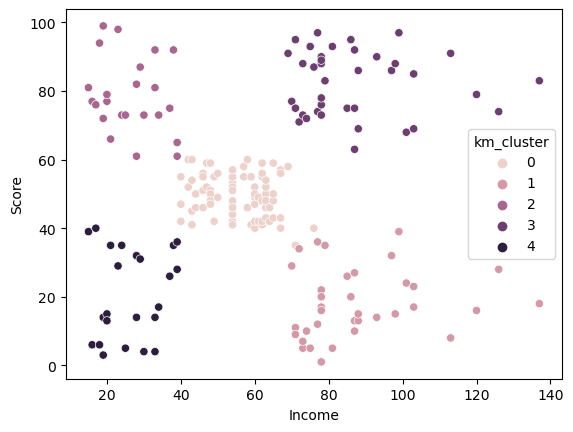

In [39]:
sns.scatterplot(x="Income",y="Score",data=df,hue="km_cluster")
plt.show()

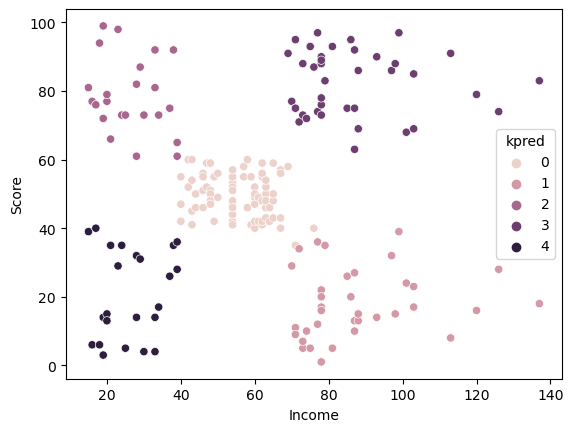

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , init = "k-means++", random_state=True)
kmeans.fit(X)
kpred = kmeans.predict(X)

sns.scatterplot(x="Income",y="Score",data=X,hue=X["kpred"])
plt.show()